In [4]:
from matplotlib.pylab import sqrt
import matplotlib.pyplot as plt
import pandas as pd
import os

In [5]:
csv_files = [f for f in os.listdir("./data") if f.endswith('.csv')]
df_list = [pd.read_csv(os.path.join("./data", file), delimiter="|") for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

### 14: Visualisierung der Zielvariable in Abhängigkeit zum Alter und der Balance 

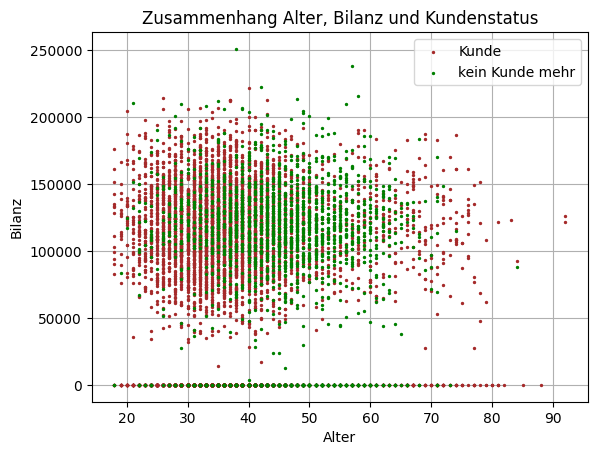

In [23]:
customer_df = df[df["churn"] == 0]
not_customer_df = df[df["churn"] == 1]

fig, ax = plt.subplots()

ax.scatter(customer_df["age"], customer_df["balance"], c="brown", s=2, label="Kunde")
ax.scatter(not_customer_df["age"], not_customer_df["balance"], c="g", s=2, label="kein Kunde mehr")
ax.set_xlabel("Alter")
ax.set_ylabel("Bilanz")
ax.set_title("Zusammenhang Alter, Bilanz und Kundenstatus")
ax.legend()
ax.grid()
ax.set_axisbelow(True)
plt.show()

### 15: Standardisierung Gender

In [7]:
#entweder 'female' oder 'male'. Sonstiges wird auf den häufigsten Wert gesetzt (hier: 'male')
df["gender"] = df["gender"].str.lower()
df.loc[df["gender"] == "f", "gender"] = "female"
df.loc[df["gender"] == "m", "gender"] = "male"
df.loc[(df["gender"] != "male") & (df["gender"] != "female"), "gender"] = df["gender"].value_counts().idxmax() #idxmax: gibt den Index des Maximums zurück

### 16: Umgang mit irrelevanten Spalten

In [8]:
df = df.drop(columns=['num_kids'])  # num_kids hat nur einen Wert

### 17: Verteilung des geschätzten Kontostandes

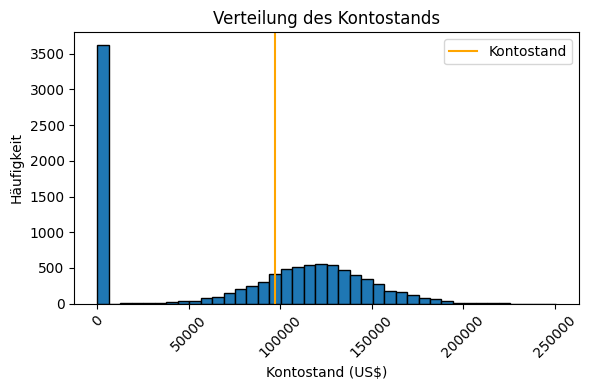

In [9]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
# bins = int(sqrt(abs(df["balance"].min())+abs(df["balance"].max())))
# print(abs(df["balance"].min())+abs(df["balance"].max()), " Range")
# print(bins, " Bins") #-> 500 bins
ax.hist(df["balance"], bins=40, edgecolor="black")
# ax vertical line
ax.axvline(df["balance"].median(), color="orange", label="Kontostand")

ax.set_title("Verteilung des Kontostands")
ax.set_ylabel("Häufigkeit")
ax.set_xlabel("Kontostand (US$)")
ax.tick_params(axis='x', labelrotation=45)
ax.legend()
plt.tight_layout()
plt.show()

### 18: Verteilung der Balance in Deutschland

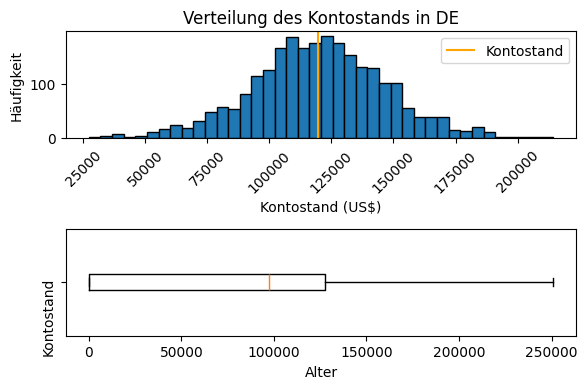

In [10]:
fig, ax = plt.subplots(2,1, figsize=(6,4))
ax[0].hist(df.loc[df["country"]=="Germany", "balance"], bins=40, edgecolor="black")
# ax vertical line
ax[0].axvline(df.loc[df["country"]=="Germany", "balance"].median(), color="orange", label="Kontostand")

ax[0].set_title("Verteilung des Kontostands in DE")
ax[0].set_ylabel("Häufigkeit")
ax[0].set_xlabel("Kontostand (US$)")
ax[0].tick_params(axis='x', labelrotation=45)
ax[0].legend()

ax[1].boxplot(df["balance"].fillna(df.loc[df["country"]=="Germany", "balance"].median()), vert=False)
ax[1].set_yticklabels(["Kontostand"], rotation=90)
ax[1].set_xlabel("Alter")
plt.tight_layout()
plt.show()